In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/prepared_data_from_contributors.csv", sep=";")

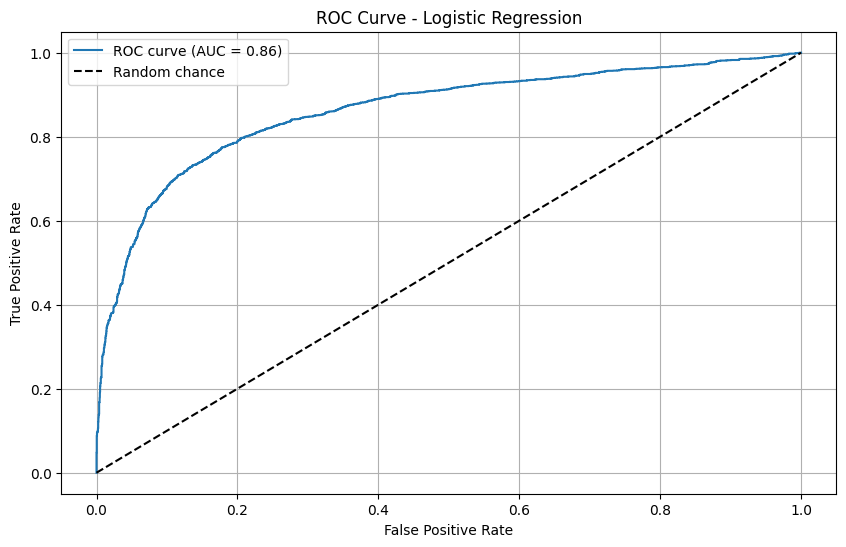

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

features = [
    "inflight_wifi_service", "ease_of_online_booking", "food_and_drink", "online_boarding", "seat_comfort", 
    "inflight_entertainment", "on-board_service", "leg_room_service", "baggage_handling", 
    "checking_service", "inflight_service", "cleanliness"
]
X = df[features]
y = df["satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, random_state=42)

param_grid = [
    {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1'],
        'solver': ['liblinear']
    },
    {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['liblinear', 'saga']
    },
    {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'l1_ratio': [0.1, 0.5, 0.9]
    }
]

grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    error_score='raise'
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
y_pred_sample = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_sample)
conf_matrix = confusion_matrix(y_test, y_pred)

fpr, tpr, _ = roc_curve(y_test, y_pred_sample)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid()
plt.show()

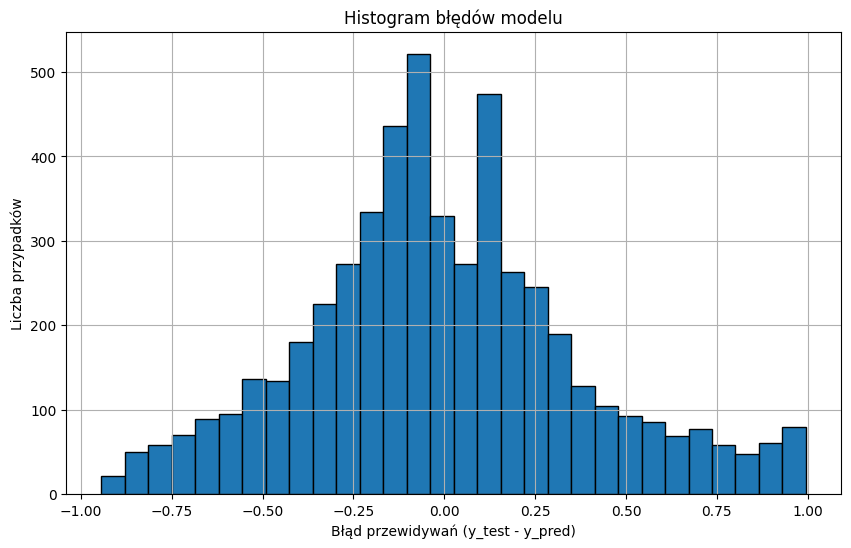

In [4]:
errors = y_test - y_pred_sample  # Różnice między prawdziwymi a przewidywanymi wartościami
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='black')
plt.xlabel("Błąd przewidywań (y_test - y_pred)")
plt.ylabel("Liczba przypadków")
plt.title("Histogram błędów modelu")
plt.grid()

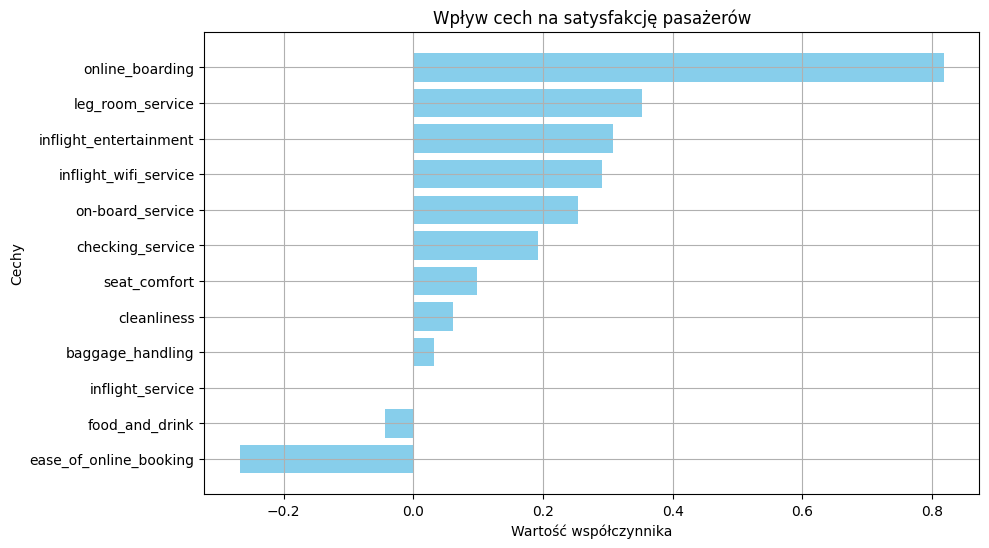

In [7]:
import numpy as np

coefs = best_model.coef_[0]  # Pobranie współczynników
sorted_idx = np.argsort(coefs)  # Sortowanie wartości
sorted_features = [features[i] for i in sorted_idx]
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, coefs[sorted_idx], color='skyblue')
plt.xlabel("Wartość współczynnika")
plt.ylabel("Cechy")
plt.title("Wpływ cech na satysfakcję pasażerów")
plt.grid()
plt.show()

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
 
mae = mean_absolute_error(y_test, y_pred_sample)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_sample))
accuracy = accuracy_score(y_test, y_pred)
 
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Accuracy: {accuracy:.4f}")

MAE: 0.2959
RMSE: 0.3811
Accuracy: 0.8004
